# Schelling Segregation Model

## Background

The Schelling (1971) segregation model is a classic of agent-based modeling, demonstrating how agents following simple rules lead to the emergence of qualitatively different macro-level outcomes. Agents are randomly placed on a grid. There are two types of agents, one constituting the majority and the other the minority. All agents want a certain number (generally, 3) of their 8 surrounding neighbors to be of the same type in order for them to be happy. Unhappy agents will move to a random available grid space. While individual agents do not have a preference for a segregated outcome (e.g. they would be happy with 3 similar neighbors and 5 different ones), the aggregate outcome is nevertheless heavily segregated.

## Implementation

This is a demonstration of running a Mesa model in an IPython Notebook. The actual model and agent code are implemented in Schelling.py, in the same directory as this notebook. Below, we will import the model class, instantiate it, run it, and plot the time series of the number of happy agents.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random 
random.seed(1234)
%matplotlib inline

from US_elections.model_us import SchellingModel_US
from UK_elections.model_uk import SchellingModel_UK
from AUS_elections.model_aus import SchellingModel_AUS

Now we instantiate a model instance: a 10x10 grid, with an 80% change of an agent being placed in each cell, approximately 20% of agents set as minorities, and agents wanting at least 3 similar neighbors.

In [2]:
model_us = SchellingModel_US(33, 33, 0.7, 0.33, 0.16, 0.17, 5, 1, 0.5)

print("US:")
print(model_us.elections_type_total)
print(model_us.type0)
print(model_us.type1)
print("")

model_uk = SchellingModel_UK(33, 33, 0.7, 0.33, 0.16, 0.17, 5, 1, 0.5)
print("UK:")
print(model_uk.elections_type_total)
print(model_uk.type0)
print(model_uk.type1)
print("")

model_aus = SchellingModel_AUS(33, 33, 0.7, 0.33, 0.16, 0.17, 5, 1, 0.5)
print("AUS:")
print(model_aus.elections_type_total)
print(model_aus.type0)
print(model_aus.type1)
print("")

US:
[88, 94, 100, 92, 84, 83, 69, 76, 74]
260
249

UK:
[84, 91, 81, 76, 89, 85, 86, 86, 79]
256
247

AUS:
[84, 87, 83, 82, 78, 78, 100, 91, 82]
281
268



We want to run the model until all the agents are happy with where they are. However, there's no guarentee that a given model instantiation will *ever* settle down. So let's run it for either 100 steps or until it stops on its own, whichever comes first:

In [3]:
while model_us.running and model_us.schedule.steps < 100:
    model_us.step()
print(model_us.schedule.steps) # Show how many steps have actually run

while model_uk.running and model_uk.schedule.steps < 100:
    model_uk.step()
print(model_uk.schedule.steps) # Show how many steps have actually run

while model_aus.running and model_aus.schedule.steps < 100:
    model_aus.step()
print(model_aus.schedule.steps) # Show how many steps have actually run

100
100
100


The model has a DataCollector object, which checks and stores how many agents are happy at the end of each step. It can also generate a pandas DataFrame of the data it has collected:

In [4]:
model_out_us = model_us.datacollector.get_model_vars_dataframe()
model_out_agents_us = model_us.datacollector.get_agent_vars_dataframe()

model_out_uk = model_uk.datacollector.get_model_vars_dataframe()
model_out_agents_uk = model_uk.datacollector.get_agent_vars_dataframe()

model_out_aus = model_aus.datacollector.get_model_vars_dataframe()
model_out_agents_aus = model_aus.datacollector.get_agent_vars_dataframe()

In [5]:
model_out_agents_us

x   y  util  loc  type            neighbor_types  elec_util
Step AgentID                                                               
0    (0, 0)    29   6   3.5    2     0           [0, 3, 0, 1, 1]          1
     (0, 2)    17   9   4.5    1     0     [2, 3, 0, 0, 0, 1, 2]          1
     (0, 3)     0  16   2.0    3     1        [0, 1, 0, 3, 1, 3]          0
     (0, 5)    18  14   1.0    4     2           [3, 1, 3, 1, 0]          0
     (0, 6)     2   7   2.5    0     1           [1, 0, 0, 1, 2]          0
     (0, 7)    19  28   4.5    7     0  [0, 1, 3, 3, 2, 1, 0, 3]          1
     (0, 8)     0  13   1.5    3     1        [3, 3, 2, 1, 0, 0]          0
     (0, 9)    21  13   3.5    4     1        [3, 1, 2, 1, 1, 3]          0
     (0, 10)    3  23   3.0    6     3           [3, 2, 0, 0, 1]          1
     (0, 11)    3   8   1.0    0     3                 [1, 1, 2]          1
     (0, 12)   23   0   3.0    2     1     [0, 1, 0, 1, 0, 3, 0]          1
     (0, 13)   19   0   2.0    1     2        [1, 1, 0, 0, 0, 3]          1
     (0, 14)   32  14   2.5    5     0        [3, 1, 2, 3, 0, 3]          0
     (0, 15)   23  23   5.0    8     1        [1, 1, 3, 1, 1, 3]          1
     (0, 16)    8  20   2.5    3     1           [3, 2, 1, 0, 3]          1
     (0, 17)   10   9   4.0    0     1              [1, 1, 0, 1]          1
     (0, 18)   32  12   2.0    5     1           [0, 0, 1, 0, 3]          1
     (0, 19)   12   9   1.0    1     0              [1, 1, 2, 0]          0
     (0, 20)   13   5   2.5    1     2           [0, 2, 3, 1, 0]          1
     (0, 21)   18  21   4.5    4     1     [3, 1, 1, 1, 0, 2, 3]          1
     (0, 22)   15  32   3.5    7     0              [0, 3, 0, 0]          0
     (0, 23)   19  18   3.0    4     0        [0, 1, 1, 0, 2, 2]          1
     (0, 26)   25  28   2.5    8     0        [1, 2, 1, 3, 1, 0]          1
     (0, 27)    7  30   5.5    6     0        [3, 0, 1, 0, 0, 0]          1
     (0, 28)   10  17   3.0    3     0           [3, 0, 1, 1, 3]          1
     (0, 29)    7  20   2.5    3     0        [0, 1, 1, 3, 1, 2]          1
     (0, 31)    6  17   3.0    3     1     [0, 2, 1, 1, 2, 3, 0]          0
     (1, 1)    27  20   0.5    5     1        [2, 0, 0, 0, 0, 0]          0
     (1, 2)     3   0   3.5    0     0              [0, 0, 3, 1]          1
     (1, 3)    23  25   0.5    8     1        [0, 0, 2, 3, 0, 0]          0
...            ..  ..   ...  ...   ...                       ...        ...
99   (32, 0)    8  25   5.0    6     0           [0, 0, 1, 0, 0]          1
     (32, 1)    6   0   8.5    0     3  [0, 3, 3, 3, 3, 3, 3, 3]          1
     (32, 2)    7  30   9.0    6     3  [3, 3, 3, 3, 3, 3, 3, 3]          1
     (32, 3)   30   8   8.0    2     1     [1, 1, 1, 1, 1, 1, 1]          1
     (32, 4)    4  13   9.0    3     0  [0, 0, 0, 0, 0, 0, 0, 0]          1
     (32, 5)   22  27   8.5    8     1  [1, 1, 1, 1, 1, 1, 2, 1]          1
     (32, 6)   24  28   9.0    8     1  [1, 1, 1, 1, 1, 1, 1, 1]          1
     (32, 7)   11  29   0.5    7     2                    [1, 0]          0
     (32, 8)   28   7   9.0    2     1  [1, 1, 1, 1, 1, 1, 1, 1]          1
     (32, 9)   23   6   6.0    2     2     [3, 2, 2, 2, 2, 2, 3]          1
     (32, 10)  21  30   9.0    7     1  [1, 1, 1, 1, 1, 1, 1, 1]          1
     (32, 11)  25   4   8.0    2     2     [2, 2, 2, 2, 2, 2, 2]          1
     (32, 12)   2  23   7.0    6     3  [0, 0, 0, 3, 0, 3, 3, 3]          1
     (32, 13)   0  10   6.5    0     0        [3, 0, 0, 0, 0, 0]          1
     (32, 14)  29  19   9.0    5     1  [1, 1, 1, 1, 1, 1, 1, 1]          1
     (32, 15)  18  20   1.5    4     3                    [2, 0]          1
     (32, 16)  26   3   7.0    2     2  [1, 1, 1, 2, 1, 2, 2, 2]          1
     (32, 17)   8   2   9.0    0     3  [3, 3, 3, 3, 3, 3, 3, 3]          1
     (32, 18)   5  11   9.0    3     0  [0, 0, 0, 0, 0, 0, 0, 0]          1
     (32, 19)  32   0   1.5    2     2                 [2, 1, 3]

In [6]:
model_out_agents_uk

x   y  util  loc  type            neighbor_types  elec_util
Step AgentID                                                               
0    (0, 0)     6  14   5.0    3     1  [1, 1, 1, 0, 1, 1, 0, 3]          0
     (0, 1)    31   1   2.0    2     1                    [1, 1]          0
     (0, 2)    22   1   1.0    2     1        [3, 3, 3, 3, 2, 1]          0
     (0, 3)    21   4   2.0    1     0        [1, 0, 0, 2, 2, 3]          0
     (0, 4)    31  24   3.5    8     3     [0, 2, 1, 0, 2, 2, 3]          1
     (0, 5)     0  21   2.0    3     1                 [1, 2, 1]          0
     (0, 6)    28  28   2.0    8     1                 [1, 1, 0]          0
     (0, 7)     2  27   2.0    6     0        [1, 1, 0, 0, 3, 1]          0
     (0, 8)    22  27   3.0    8     0        [2, 3, 0, 3, 0, 0]          0
     (0, 10)   18  25   2.0    7     0        [0, 1, 1, 1, 3, 0]          0
     (0, 11)   28  32   2.5    8     2     [1, 3, 1, 3, 3, 0, 1]          1
     (0, 12)   12  17   3.0    4     1              [1, 1, 0, 1]          0
     (0, 13)    9  16   2.0    3     1        [1, 3, 0, 0, 1, 3]          0
     (0, 16)    7  28   1.0    6     1           [0, 0, 2, 1, 3]          0
     (0, 17)   18  30   3.0    7     1        [2, 0, 1, 1, 1, 0]          0
     (0, 19)   26   6   0.0    2     1     [0, 0, 0, 3, 0, 0, 3]          0
     (0, 20)    6  10   1.0    0     0        [1, 2, 1, 1, 1, 0]          0
     (0, 21)    0  19   2.0    3     0        [0, 3, 2, 1, 0, 3]          0
     (0, 22)    9   4   3.0    0     1        [0, 1, 1, 1, 2, 2]          0
     (0, 23)   15  16   0.0    4     1                    [3, 2]          0
     (0, 24)   32  27   2.0    8     2     [0, 1, 2, 1, 1, 2, 1]          0
     (0, 25)   13   8   2.5    1     2        [2, 1, 0, 2, 3, 1]          0
     (0, 27)   14  32   1.0    7     1           [0, 1, 0, 3, 3]          0
     (0, 28)   16  24   1.0    7     1        [0, 0, 3, 1, 0, 3]          0
     (0, 29)   21   1   3.0    1     0                 [0, 2, 0]          1
     (0, 30)   15   6   3.0    1     0        [0, 0, 3, 2, 1, 2]          1
     (0, 32)    2  16   0.0    3     1           [2, 2, 2, 0, 0]          0
     (1, 0)    18  20   3.5    4     2     [2, 3, 3, 3, 0, 0, 1]          1
     (1, 2)     3  30   1.0    6     0              [3, 0, 1, 1]          0
     (1, 4)    21  13   2.5    4     2           [1, 2, 0, 0, 3]          1
...            ..  ..   ...  ...   ...                       ...        ...
99   (31, 27)  26  15   9.0    5     0  [0, 0, 0, 0, 0, 0, 0, 0]          1
     (31, 28)  32   6   6.0    2     0        [0, 0, 0, 0, 0, 3]          1
     (31, 29)  25  12   9.0    5     0  [0, 0, 0, 0, 0, 0, 0, 0]          1
     (31, 30)   6  31   9.0    6     1  [1, 1, 1, 1, 1, 1, 1, 1]          1
     (31, 32)  20  31   7.5    7     2     [2, 2, 2, 2, 2, 2, 3]          1
     (32, 0)   25  29   6.5    8     2        [2, 2, 2, 2, 3, 2]          1
     (32, 1)   22  30   6.5    8     2        [2, 2, 2, 2, 3, 2]          1
     (32, 5)   24   7   9.0    2     0  [0, 0, 0, 0, 0, 0, 0, 0]          1
     (32, 6)   22  25   9.0    8     2  [2, 2, 2, 2, 2, 2, 2, 2]          1
     (32, 7)   13  17   4.0    4     3           [2, 2, 3, 2, 2]          1
     (32, 10)  25  14   9.0    5     0  [0, 0, 0, 0, 0, 0, 0, 0]          1
     (32, 12)   6  18   2.0    3     1              [3, 3, 1, 1]          0
     (32, 13)  19  32   6.0    7     2     [2, 2, 2, 2, 3, 3, 1]          1
     (32, 14)  10   8   9.0    0     1  [1, 1, 1, 1, 1, 1, 1, 1]          1
     (32, 15)   6  29   9.0    6     1  [1, 1, 1, 1, 1, 1, 1, 1]          1
     (32, 16)   5  31   9.0    6     1  [1, 1, 1, 1, 1, 1, 1, 1]          1
     (32, 17)  22   7   6.0    2     0     [1, 0, 0, 3, 0, 0, 0]          1
     (32, 18)   2  25   7.0    6     1     [1, 0, 1, 1, 1, 1, 1]          1
     (32, 19)  27  15   9.0    5     0  [0, 0, 0, 0, 0, 0, 0, 0]          1
     (32, 20)  16   0   0.5    1     2           [3, 1, 0, 1, 1]

In [7]:
model_out_agents_aus

x   y  util  loc  type            neighbor_types  elec_util
Step AgentID                                                               
0    (0, 2)     1   6   2.0    0     0           [1, 2, 2, 1, 0]        1.0
     (0, 4)    28  29   1.5    8     2              [1, 1, 3, 2]        0.0
     (0, 5)    10  26   2.0    6     0              [2, 1, 0, 3]        1.0
     (0, 7)    14  19   3.0    4     1           [1, 1, 0, 1, 0]        0.0
     (0, 11)   24  13   3.0    5     1              [1, 3, 0, 1]        1.0
     (0, 14)   32  18   1.0    5     1              [0, 2, 0, 2]        1.0
     (0, 15)   25  32   2.0    8     0        [3, 2, 0, 1, 2, 0]        0.0
     (0, 18)    5   4   6.0    0     1     [0, 1, 2, 1, 1, 1, 1]        1.0
     (0, 19)   21  18   1.5    4     3           [0, 1, 3, 1, 2]        0.0
     (0, 21)    8  14   2.0    3     3        [3, 1, 0, 1, 3, 0]        0.0
     (0, 22)   25  16   0.0    5     1           [2, 2, 0, 0, 0]        0.0
     (0, 23)    1   5   3.0    0     0        [2, 2, 0, 0, 3, 1]        1.0
     (0, 24)   25   6   2.0    2     1           [0, 1, 1, 0, 0]        0.0
     (0, 25)   12  12   2.0    4     1           [0, 2, 1, 0, 1]        0.0
     (0, 26)   13  12   1.0    4     0              [3, 1, 3, 2]        1.0
     (0, 27)   26  25   2.0    8     1           [2, 1, 3, 1, 0]        0.0
     (0, 29)    5  15   3.0    3     0        [2, 1, 0, 2, 0, 1]        1.0
     (0, 30)   23   9   2.0    2     0           [3, 1, 1, 0, 3]        1.0
     (0, 31)   12   2   2.0    1     0     [2, 2, 1, 1, 2, 2, 0]        1.0
     (0, 32)   25  15   1.0    5     2           [0, 1, 2, 0, 0]        0.0
     (1, 0)    10  24   1.5    6     2     [3, 3, 1, 3, 0, 0, 0]        0.0
     (1, 1)     4  31   1.0    6     1        [3, 3, 3, 1, 3, 0]        0.0
     (1, 2)    20  13   2.0    4     1                    [1, 1]        0.0
     (1, 3)    32  29   3.5    8     3     [1, 3, 3, 3, 1, 0, 1]        0.5
     (1, 4)     1  27   2.0    6     1        [1, 0, 1, 2, 3, 0]        0.0
     (1, 5)     5   6   2.0    0     1           [1, 1, 0, 0, 3]        0.0
     (1, 6)     7  24   1.0    6     2                    [2, 0]        0.0
     (1, 7)     2  31   2.0    6     1        [1, 0, 2, 3, 0, 1]        0.0
     (1, 9)    21  21   2.0    4     1           [1, 1, 0, 0, 3]        0.0
     (1, 10)   28   2   2.5    2     3        [0, 1, 0, 3, 1, 3]        0.5
...            ..  ..   ...  ...   ...                       ...        ...
99   (31, 22)   4  12   3.5    3     1     [1, 0, 2, 1, 1, 2, 3]        0.5
     (31, 24)   5  12   0.5    3     0                 [2, 2, 1]        0.5
     (31, 25)  12  24   3.5    7     3     [1, 0, 0, 2, 0, 3, 3]        1.0
     (31, 26)  22  32   3.0    8     2           [2, 0, 1, 1, 2]        1.0
     (31, 27)  19  24   1.5    7     3              [0, 2, 1, 0]        1.0
     (31, 28)  20   0   5.0    1     0           [2, 0, 0, 0, 0]        1.0
     (31, 29)  16  18   1.5    4     1                 [1, 0, 3]        0.5
     (31, 31)  17   3   9.0    1     0  [0, 0, 0, 0, 0, 0, 0, 0]        1.0
     (32, 1)    2   2   1.5    0     0                 [3, 1, 0]        0.5
     (32, 3)    0   6   0.5    0     1                 [2, 3, 3]        0.5
     (32, 6)   13   6   9.0    1     0  [0, 0, 0, 0, 0, 0, 0, 0]        1.0
     (32, 8)   26   5   9.0    2     1  [1, 1, 1, 1, 1, 1, 1, 1]        1.0
     (32, 9)   17  29   0.5    7     0           [3, 3, 1, 1, 1]        0.5
     (32, 10)  29  30   2.5    8     0           [2, 3, 0, 0, 2]        0.5
     (32, 11)   5  17   2.5    3     1              [1, 0, 3, 1]        0.5
     (32, 14)   4  26   2.0    6     3              [1, 0, 1, 3]        1.0
     (32, 15)  17   2   9.0    1     0  [0, 0, 0, 0, 0, 0, 0, 0]        1.0
     (32, 16)   4  11   2.5    3     0              [0, 1, 1, 0]        0.5
     (32, 17)  15   6   9.0    1     0  [0, 0, 0, 0, 0, 0, 0, 0]        1.0
     (32, 18)   1   2   2.5    0     0              [1, 0, 1, 0]

In [8]:
model_out_us

,elections,happy,location_0,location_1,location_2,location_3,location_total,seg_agents,total_0,total_1,total_2,total_3
0,"[0, 0, 1, 0, 1, 1, 1, 1, 1]",55,"[26, 30, 30, 35, 33, 26, 30, 28, 22]","[25, 17, 33, 22, 33, 30, 25, 32, 32]","[17, 10, 10, 11, 10, 10, 12, 10, 20]","[17, 14, 14, 19, 15, 14, 17, 17, 14]","[85, 71, 87, 87, 91, 80, 84, 87, 88]",8,260,249,110,141
1,"[0, 1, 1, 0, 1, 1, 1, 0, 1]",102,"[34, 25, 19, 43, 31, 32, 28, 28, 20]","[15, 25, 30, 20, 35, 35, 25, 27, 37]","[15, 13, 7, 7, 10, 13, 12, 16, 17]","[9, 16, 22, 16, 17, 13, 16, 12, 20]","[73, 79, 78, 86, 93, 93, 81, 83, 94]",16,260,249,110,141
2,"[0, 1, 1, 0, 1, 1, 1, 1, 1]",143,"[37, 20, 18, 55, 27, 28, 30, 29, 16]","[23, 27, 30, 15, 30, 33, 30, 22, 39]","[13, 11, 19, 7, 12, 11, 13, 7, 17]","[18, 15, 15, 18, 12, 10, 17, 20, 16]","[91, 73, 82, 95, 81, 82, 90, 78, 88]",14,260,249,110,141
3,"[0, 0, 1, 0, 1, 1, 0, 1, 1]",145,"[39, 30, 23, 42, 30, 21, 31, 26, 18]","[16, 26, 36, 18, 19, 38, 23, 36, 37]","[10, 18, 12, 7, 12, 8, 14, 15, 14]","[20, 12, 15, 9, 26, 14, 20, 13, 12]","[85, 86, 86, 76, 87, 81, 88, 90, 81]",18,260,249,110,141
4,"[0, 0, 1, 0, 1, 1, 0, 1, 1]",182,"[39, 28, 19, 54, 25, 21, 34, 22, 18]","[23, 22, 27, 17, 34, 35, 19, 32, 40]","[15, 19, 11, 7, 7, 15, 14, 7, 15]","[14, 17, 17, 19, 11, 10, 26, 13, 14]","[91, 86, 74, 97, 77, 81, 93, 74, 87]",31,260,249,110,141
5,"[0, 0, 1, 0, 1, 1, 0, 1, 1]",209,"[35, 33, 23, 53, 21, 19, 39, 21, 16]","[22, 24, 35, 15, 30, 32, 16, 40, 35]","[6, 14, 9, 7, 16, 17, 9, 14, 18]","[17, 10, 17, 17, 9, 16, 24, 14, 17]","[80, 81, 84, 92, 76, 84, 88, 89, 86]",34,260,249,110,141
6,"[0, 0, 1, 0, 1, 1, 0, 1, 1]",223,"[43, 27, 16, 59, 16, 25, 43, 14, 17]","[18, 19, 40, 16, 28, 29, 14, 46, 39]","[14, 13, 10, 7, 17, 13, 12, 6, 18]","[14, 17, 14, 14, 11, 15, 26, 16, 14]","[89, 76, 80, 96, 72, 82, 95, 82, 88]",49,260,249,110,141
7,"[0, 0, 1, 0, 1, 1, 0, 1, 1]",248,"[42, 35, 18, 61, 21, 14, 34, 18, 17]","[20, 26, 35, 11, 26, 32, 16, 37, 46]","[10, 10, 15, 12, 18, 17, 9, 7, 12]","[19, 14, 12, 8, 13, 15, 23, 26, 11]","[91, 85, 80, 92, 78, 78, 82, 88, 86]",60,260,249,110,141
8,"[0, 0, 1, 0, 1, 1, 0, 1, 1]",259,"[42, 32, 13, 66, 21, 16, 41, 18, 11]","[17, 24, 29, 8, 31, 34, 18, 40, 48]","[10, 10, 12, 7, 7, 14, 13, 18, 19]","[19, 12, 15, 13, 19, 16, 23, 11, 13]","[88, 78, 69, 94, 78, 80, 95, 87, 91]",56,260,249,110,141
9,"[0, 0, 1, 0, 1, 1, 0, 1, 1]",263,"[40, 32, 21, 65, 19, 11, 46, 16, 10]","[22, 18, 25, 8, 27, 38, 15, 44, 52]","[8, 14, 13, 11, 10, 15, 8, 17, 14]","[14, 15, 18, 13, 19, 16, 25, 8, 13]","[84, 79, 77, 97, 75, 80, 94, 85, 89]",74,260,249,110,141


In [9]:
model_out_uk

,elections,happy,location_0,location_1,location_2,location_3,location_total,seg_agents,total_0,total_1,total_2,total_3
0,"[0, 0, 0, 1, 2, 0, 1, 2, 2]",37,"[35, 32, 28, 24, 29, 32, 25, 23, 28]","[26, 21, 24, 32, 28, 29, 36, 24, 27]","[12, 16, 12, 9, 15, 13, 15, 20, 18]","[17, 12, 14, 12, 15, 13, 11, 15, 15]","[90, 81, 78, 77, 87, 87, 87, 82, 88]",9,256,247,130,124
1,"[0, 1, 0, 2, 1, 0, 1, 2, 2]",65,"[34, 29, 37, 25, 25, 37, 24, 19, 26]","[27, 32, 20, 28, 29, 25, 35, 26, 25]","[13, 13, 17, 11, 12, 16, 10, 17, 21]","[12, 13, 18, 18, 8, 11, 11, 19, 14]","[86, 87, 92, 82, 74, 89, 80, 81, 86]",9,256,247,130,124
2,"[0, 1, 0, 1, 1, 0, 1, 2, 0]",90,"[36, 26, 42, 19, 21, 37, 15, 26, 34]","[18, 28, 12, 38, 31, 27, 39, 26, 28]","[13, 15, 13, 16, 15, 10, 19, 13, 16]","[14, 11, 16, 11, 14, 15, 17, 14, 12]","[81, 80, 83, 84, 81, 89, 90, 79, 90]",13,256,247,130,124
3,"[0, 1, 0, 1, 2, 0, 1, 2, 0]",106,"[30, 23, 46, 23, 19, 37, 26, 18, 34]","[25, 33, 22, 33, 32, 19, 38, 23, 22]","[11, 18, 12, 15, 16, 16, 15, 12, 15]","[11, 13, 9, 13, 18, 13, 11, 24, 12]","[77, 87, 89, 84, 85, 85, 90, 77, 83]",14,256,247,130,124
4,"[0, 2, 0, 1, 1, 0, 1, 2, 0]",86,"[29, 24, 45, 18, 17, 35, 29, 27, 32]","[22, 24, 16, 32, 30, 18, 45, 28, 32]","[11, 21, 12, 19, 13, 24, 9, 15, 6]","[14, 12, 19, 11, 14, 6, 9, 18, 21]","[76, 81, 92, 80, 74, 83, 92, 88, 91]",19,256,247,130,124
5,"[0, 1, 0, 2, 1, 0, 1, 2, 0]",110,"[29, 19, 48, 18, 23, 35, 23, 24, 37]","[26, 32, 14, 28, 35, 22, 39, 20, 31]","[14, 19, 11, 13, 15, 18, 6, 23, 11]","[9, 12, 17, 19, 12, 14, 15, 16, 10]","[78, 82, 90, 78, 85, 89, 83, 83, 89]",27,256,247,130,124
6,"[2, 1, 0, 2, 1, 0, 1, 2, 0]",131,"[22, 27, 50, 25, 25, 39, 21, 20, 27]","[28, 33, 19, 26, 32, 23, 42, 21, 23]","[18, 12, 6, 14, 14, 16, 10, 29, 11]","[14, 17, 11, 15, 15, 7, 13, 18, 14]","[82, 89, 86, 80, 86, 85, 86, 88, 75]",36,256,247,130,124
7,"[2, 1, 0, 2, 1, 0, 1, 2, 2]",144,"[25, 19, 47, 18, 15, 49, 29, 22, 32]","[28, 31, 23, 26, 35, 16, 45, 20, 23]","[12, 17, 11, 20, 15, 12, 8, 22, 13]","[18, 12, 10, 16, 10, 12, 7, 17, 22]","[83, 79, 91, 80, 75, 89, 89, 81, 90]",43,256,247,130,124
8,"[2, 2, 0, 2, 2, 0, 1, 2, 2]",150,"[28, 18, 48, 19, 26, 50, 22, 20, 25]","[21, 29, 22, 30, 26, 16, 49, 31, 23]","[16, 16, 9, 18, 15, 11, 11, 20, 14]","[13, 21, 6, 16, 14, 13, 10, 17, 14]","[78, 84, 85, 83, 81, 90, 92, 88, 76]",57,256,247,130,124
9,"[2, 2, 0, 2, 2, 0, 1, 2, 1]",122,"[21, 23, 58, 22, 16, 48, 24, 22, 22]","[23, 27, 19, 16, 30, 19, 52, 23, 38]","[14, 20, 12, 20, 10, 14, 12, 18, 10]","[15, 11, 6, 20, 24, 8, 4, 22, 14]","[73, 81, 95, 78, 80, 89, 92, 85, 84]",35,256,247,130,124


In [10]:
model_out_aus

,elections,happy,location_0,location_1,location_2,location_3,location_total,seg_agents,total_0,total_1,total_2,total_3
0,"[0, 0, 1, 0, 0, 2, 1, 0, 0]",43,"[42, 48, 33, 45, 46, 20, 38, 53, 28]","[41, 43, 43, 43, 39, 34, 47, 36, 28]","[12, 11, 6, 10, 8, 13, 11, 14, 13]","[14, 15, 18, 10, 13, 15, 7, 9, 17]","[83, 91, 76, 88, 85, 82, 85, 89, 86]",4,281,268,98,118
1,"[2, 1, 0, 1, 2, 0, 1, 0, 0]",87,"[21, 41, 31, 42, 29, 39, 36, 38, 52]","[34, 46, 32, 44, 21, 36, 51, 22, 36]","[12, 7, 16, 9, 12, 9, 10, 10, 13]","[18, 16, 15, 11, 19, 6, 11, 12, 10]","[85, 87, 94, 86, 81, 75, 87, 82, 88]",6,281,268,98,118
2,"[2, 1, 1, 2, 2, 1, 2, 0, 0]",90,"[24, 31, 39, 36, 25, 42, 21, 51, 50]","[32, 46, 45, 15, 31, 45, 46, 23, 40]","[16, 8, 11, 15, 11, 10, 9, 9, 9]","[9, 14, 14, 14, 15, 16, 18, 7, 11]","[81, 77, 84, 80, 82, 87, 94, 90, 90]",20,281,268,98,118
3,"[2, 1, 2, 0, 0, 0, 1, 0, 2]",86,"[25, 38, 19, 31, 43, 44, 31, 55, 44]","[29, 47, 37, 28, 38, 42, 44, 34, 23]","[15, 9, 12, 10, 12, 8, 7, 13, 12]","[19, 12, 15, 18, 12, 13, 12, 5, 12]","[88, 85, 83, 87, 81, 86, 75, 89, 91]",13,281,268,98,118
4,"[1, 1, 1, 2, 2, 2, 2, 0, 2]",89,"[40, 40, 41, 19, 34, 28, 23, 44, 36]","[41, 50, 51, 35, 27, 20, 38, 25, 19]","[7, 6, 11, 6, 14, 21, 11, 10, 12]","[12, 11, 15, 15, 16, 16, 14, 9, 10]","[81, 90, 92, 75, 91, 85, 86, 88, 77]",10,281,268,98,118
5,"[1, 1, 1, 2, 2, 2, 2, 0, 2]",81,"[43, 45, 30, 29, 33, 28, 22, 53, 35]","[46, 46, 45, 27, 21, 20, 35, 43, 26]","[13, 6, 8, 11, 13, 9, 10, 10, 18]","[12, 10, 10, 18, 15, 19, 13, 9, 12]","[89, 91, 75, 85, 82, 76, 80, 96, 91]",11,281,268,98,118
6,"[1, 1, 2, 1, 1, 0, 1, 2, 2]",93,"[37, 41, 22, 34, 42, 46, 41, 45, 27]","[45, 50, 39, 37, 45, 38, 49, 22, 23]","[8, 5, 20, 10, 11, 10, 10, 12, 12]","[11, 13, 8, 11, 16, 13, 16, 13, 17]","[82, 91, 89, 71, 87, 84, 90, 92, 79]",7,281,268,98,118
7,"[1, 0, 1, 2, 1, 2, 2, 1, 2]",108,"[20, 49, 36, 33, 40, 38, 23, 42, 36]","[40, 45, 49, 20, 43, 20, 35, 42, 25]","[13, 6, 10, 17, 12, 14, 6, 8, 12]","[6, 13, 11, 17, 13, 11, 19, 14, 14]","[79, 94, 85, 87, 83, 83, 83, 84, 87]",23,281,268,98,118
8,"[1, 0, 1, 2, 1, 0, 2, 0, 2]",99,"[43, 51, 31, 25, 41, 44, 22, 51, 31]","[48, 36, 61, 22, 41, 37, 32, 39, 21]","[12, 8, 4, 18, 7, 11, 11, 16, 11]","[12, 8, 16, 14, 11, 11, 17, 11, 18]","[91, 87, 92, 79, 82, 81, 82, 90, 81]",14,281,268,98,118
9,"[1, 0, 1, 1, 0, 2, 1, 0, 2]",101,"[36, 47, 35, 40, 28, 36, 35, 52, 19]","[49, 25, 49, 42, 28, 24, 45, 36, 26]","[10, 7, 8, 10, 13, 18, 10, 9, 13]","[13, 10, 9, 12, 21, 13, 11, 11, 18]","[85, 89, 84, 82, 90, 91, 80, 88, 76]",23,281,268,98,118


Finally, we can plot the 'happy' series:

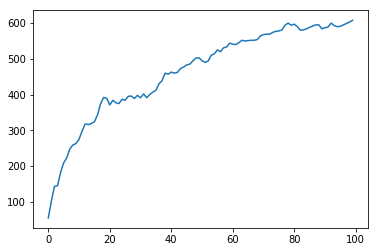

In [11]:
model_out_us.happy.plot()

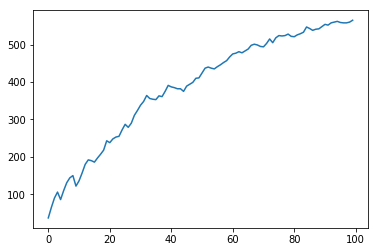

In [12]:
model_out_uk.happy.plot()

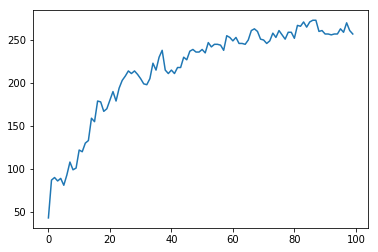

In [13]:
model_out_aus.happy.plot()

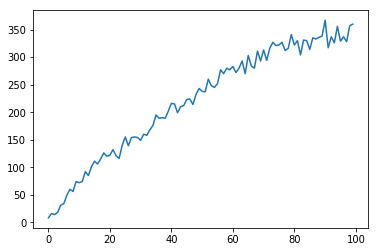

In [14]:
model_out_us.seg_agents.plot()

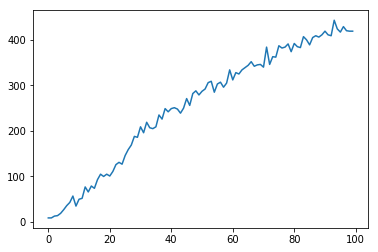

In [15]:
model_out_uk.seg_agents.plot()

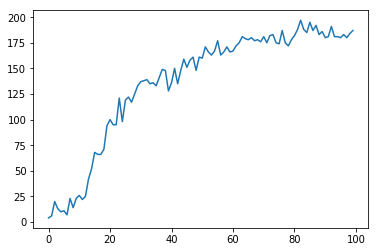

In [16]:
model_out_aus.seg_agents.plot()

# Notation

$J$ - no. of locations  
$j$ - location identifier  
$m$ - group identifier  
$M$ - no. of groups  
$t_{j}$ - no. of people in location i  
$T$ - total number of people  
$\pi_{m}$ - proportion of group m  
$\pi_j$ - proportion of people that belong to some group in location j  
$\pi_{jm}$ - proportion of group m in location i  
$I = \sum_{m = 1}^{M} \pi_m (1 - \pi_m)$ - interaction index  
$E = \sum_{m = 1}^{M} \pi_m ln(\frac{1}{\pi_m})$ - Entropy index  

References for formulas:  
"R&F '02" - Reardon, S. F. and Firebaugh, G. (2002), Measures of Multigroup Segregation. Sociological Methodology, 32: 33–67. doi:10.1111/1467-9531.00110.  
"Census" - https://www.census.gov/hhes/www/housing/resseg/pdf/app_b.pdf

# 1) Dissimilarity Index (multi-group) (R&F '02)

Formula:

$\frac{1}{2} \sum_{m = 1}^{M} \sum_{j = 1}^{J} \frac{t_{j}}{TI} | \pi_{jm} - \pi_{m} |$

Measures whether individuals tend to live in similar neighborhoods compared to the overall population in the area. Low values correspond to low segregation and vice versa.

# 2) Information theory (multi-group) (R&F '02)

Formula:

$\sum_{m = 1}^{M} \sum_{j = 1}^{J} \frac{t_{j}}{TE} \pi_{jm} ln \frac{\pi_{jm}}{\pi_{m}}$

Measures whether each region is different from one another. When value is low all regions are similarly distributed, when the value is high, regions have distinct distributions.

# 3) Isolation Index (Census)

Formula for each group m:

$\sum_{j = 1}^{J} \pi_j \pi_{jm}$

Measures the extent to which you are exposed to your own group

# 4) Squared coefficient of variation (multi-group) (R&F '02)

Formula:  
$\sum_{m = 1}^{M} \sum_{j = 1}^{J} \frac{t_{j}}{T} \frac{(\pi_{jm} - \pi_{m})^{2}}{(M-1)\pi_{m}}$

# 5) Relative diversity (multi-group) (R&F '02)

Formula:  
$\sum_{m = 1}^{M} \sum_{j = 1}^{J} \frac{t_{j}}{TI} (\pi_{jm} - \pi_{m})^{2}$

# Other measures (not based on literature)